In [1]:
import pandas as pd
import matplotlib.pylab as plt
from aup.ET.Connector.SQLiteConnector import SQLiteConnector
import json
%matplotlib inline

In [2]:
# connect to the result
sql = SQLiteConnector("./.aup/sqlite3.db")

In [3]:
# Get all experiments (this run is for iris using hyperopt, sequence, spearmint, random)
eids = sql.get_all_experiment()
eids

[1, 2, 3, 4]

In [4]:
# Show details in one experiment
sql.cursor.execute("SELECT * FROM experiment where eid = ?", (eids[1],))
sql.cursor.fetchone()

(2,
 1,
 1564088286,
 1564088287,
 '{"proposer": "random", "n_samples": 10, "random_seed": 1, "script": "rosenbrock_hpo.py", "parameter_config": [{"name": "x", "range": [-5, 5], "type": "float"}, {"name": "y", "range": [-5, 5], "type": "float"}], "resource": "cpu", "n_parallel": 2, "target": "min", "workingdir": "/Users/jason.liu/PycharmProjects/CTE/Examples/2dfunc_diff_opt"}')

In [5]:
# show details in job history for one experiment
history = sql.get_all_history(1)
history = pd.DataFrame(history)
history.columns = ['jid', 'score','eid','rid','start_time','end_time','job_config']
history

,jid,score,eid,rid,start_time,end_time,job_config
0,1,90036.000000,1,3,1564088282,1564088283,"{'x': -5, 'y': -5}"
1,2,40519.252553,1,2,1564088282,1564088283,"{'x': -3.888888888888889, 'y': -5}"
2,3,16184.062795,1,1,1564088282,1564088283,"{'x': -2.7777777777777777, 'y': -5}"
3,4,6056.493827,1,4,1564088282,1564088283,"{'x': -1.6666666666666665, 'y': -5}"
4,5,2820.587715,1,3,1564088283,1564088283,"{'x': -0.5555555555555554, 'y': -5}"
5,6,2818.365493,1,2,1564088283,1564088283,"{'x': 0.5555555555555558, 'y': -5}"
6,7,6049.827160,1,1,1564088283,1564088283,"{'x': 1.666666666666667, 'y': -5}"
7,8,16172.951684,1,4,1564088283,1564088283,"{'x': 2.777777777777778, 'y': -5}"
8,9,40503.696997,1,3,1564088283,1564088283,"{'x': 3.8888888888888893, 'y': -5}"
9,10,90016.000000,1,2,1564088283,1564088283,"{'x': 5.0, 'y': -5}"


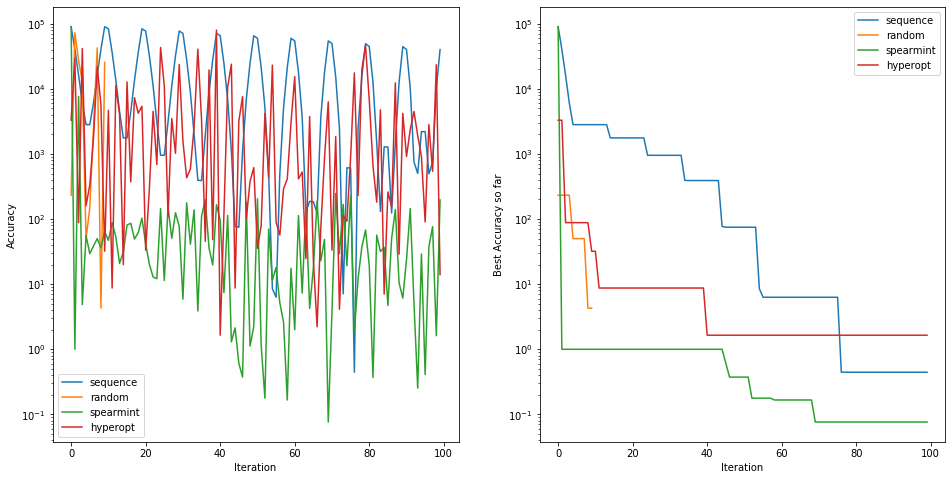

In [6]:
plt.figure(figsize=(16,8))
plt.subplot(121)
for i in eids:
    history = sql.get_all_history(i)
    history = pd.DataFrame(history)
    history.columns = ['jid', 'score','eid','rid','start_time','end_time','job_config']
    sql.cursor.execute("SELECT * FROM experiment where eid = ?", (i,))
    label = json.loads(sql.cursor.fetchone()[4])['proposer']
    plt.plot(history.score, label=label)
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.yscale("log")

plt.subplot(122)
for i in eids:
    history = sql.get_all_history(i)
    history = pd.DataFrame(history)
    history.columns = ['jid', 'score','eid','rid','start_time','end_time','job_config']
    sql.cursor.execute("SELECT * FROM experiment where eid = ?", (i,))
    label = json.loads(sql.cursor.fetchone()[4])['proposer']
    plt.plot(history.score.cummin(), label=label)
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Best Accuracy so far")
plt.yscale("log")

In [7]:
sql.close()